# Příspěvky na transparentním účtu LEVICE

- základní statistiky a grafy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(style="darkgrid", palette="colorblind", font_scale=1.1, rc={'figure.figsize':(16,8)})

## Načtení dat

- načte transakce za poslední 3 roky z transparentního účtu
  - je definováno rozmezí 1.1.2018 až 31.12.2020
- pročistí data pro účely dalších výpočtů

In [2]:
[sumy, tx] = pd.read_html("https://ib.fio.cz/ib/transparent?a=2101181284&f=01.01.2018&t=31.12.2020")
sumy

,Stav k: 01.01.2018,Stav k: 12.12.2020,Suma příjmů,Suma výdajů,Suma celkem,Běžný zůstatek
0,"18 300,00 CZK","19 912,00 CZK","216 280,00 CZK","-214 668,00 CZK","1 612,00 CZK","19 912,00 CZK"


In [3]:
# reverse order and replace NaNs
tx = tx.iloc[::-1].fillna('')
# set Datum as index
tx.index = pd.to_datetime(tx['Datum'], dayfirst=True)
tx = tx.drop(columns=["Datum"])
# convert Částka to float
tx['Částka'] = tx['Částka'].str.replace(",", ".").str.replace(r"[^0-9.\-]", "").astype(float)
# exclude negative values (i.e. expenses)
tx = tx[tx['Částka'] > 0]
tx

,Částka,Typ,Název protiúčtu,Zpráva pro příjemce,KS,VS,SS,Poznámka
Datum,,,,,,,,
2018-10-22,5000.0,Bezhotovostní příjem,Machník Jaromír,Jaromír Machník- dar,0,0,0,Machník Jaromír
2018-12-13,1000.0,Bezhotovostní příjem,RENCIN ZDENEK,Dar Rencin Zdenek 2018,,5.10195e+06,,RENCIN ZDENEK
2019-01-14,2000.0,Bezhotovostní příjem,"Formánková Eva,MUDr.",finanční dar Formánek,0,0,0,"Formánková Eva,MUDr."
2019-02-15,5000.0,Bezhotovostní příjem,Machník Jaromír,,0,0,0,Machník Jaromír
2019-04-01,5000.0,Bezhotovostní příjem,Machník Jaromír,Příspěvek na potřeby strany,,,,Machník Jaromír
2019-05-20,23000.0,Bezhotovostní příjem,Jiří Hudeček,Příspěvek na činnost SDS - Jiří Hudeček,0,,,Jiří Hudeček
2019-05-23,20000.0,Bezhotovostní příjem,"Neubert Milan,RNDr.",Příspěvek na činnost SDS - Milan Neubert,0,123456,0,"Neubert Milan,RNDr."
2019-06-03,10000.0,Bezhotovostní příjem,Hornych Jaroslav,PRISPEVEK SDS,0,525920,,Hornych Jaroslav
2019-06-03,10000.0,Bezhotovostní příjem,Hornych Jaroslav,PRISPEVEK SDS,0,5.10125e+08,,Hornych Jaroslav


## Základní statistiky

- počet, průměr, směrodatná odchylka, minimum, maximum, kvantily
- kvantil *50%* je medián

In [4]:
tx.describe()

,Částka
count,26.000000
mean,8318.461538
std,10888.216872
min,100.000000
25%,2137.500000
50%,5000.000000
75%,9000.000000
max,50000.000000


## Výše příspěvků v jednotlivé měsíce

<AxesSubplot:title={'center':'Vybraná částka v jednotlivé měsíce'}, xlabel='Datum'>

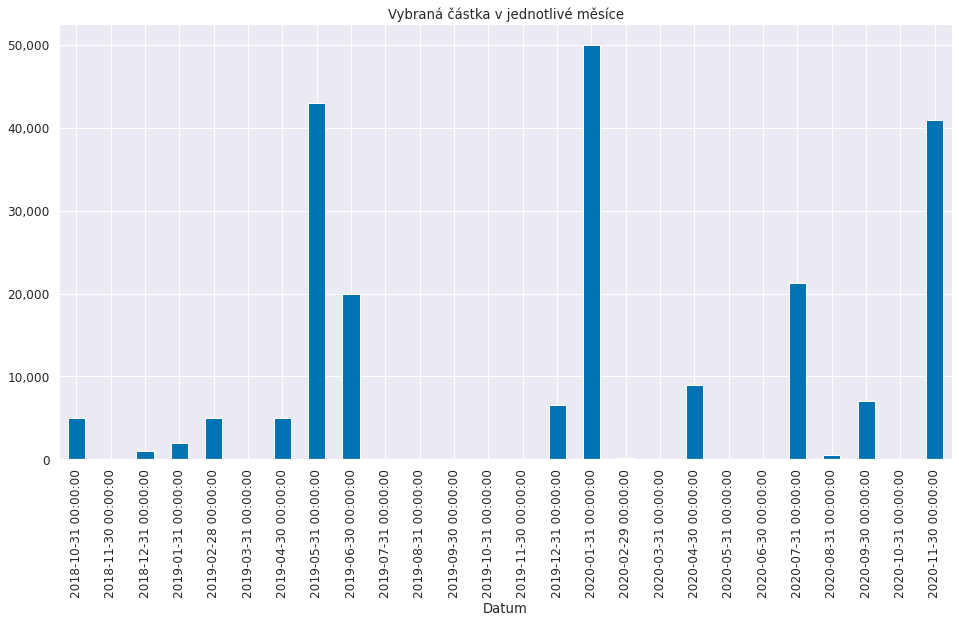

In [5]:
# contributions by days (+ filling the gaps)
cbd = tx['Částka'].groupby('Datum').sum().resample("1m").agg(np.sum)

plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

cbd.plot(kind='bar', ax=ax, title='Vybraná částka v jednotlivé měsíce')

## Celková suma příspěvků v čase

<AxesSubplot:title={'center':'Vývoj celkové vybrané sumy v čase'}, xlabel='Datum'>

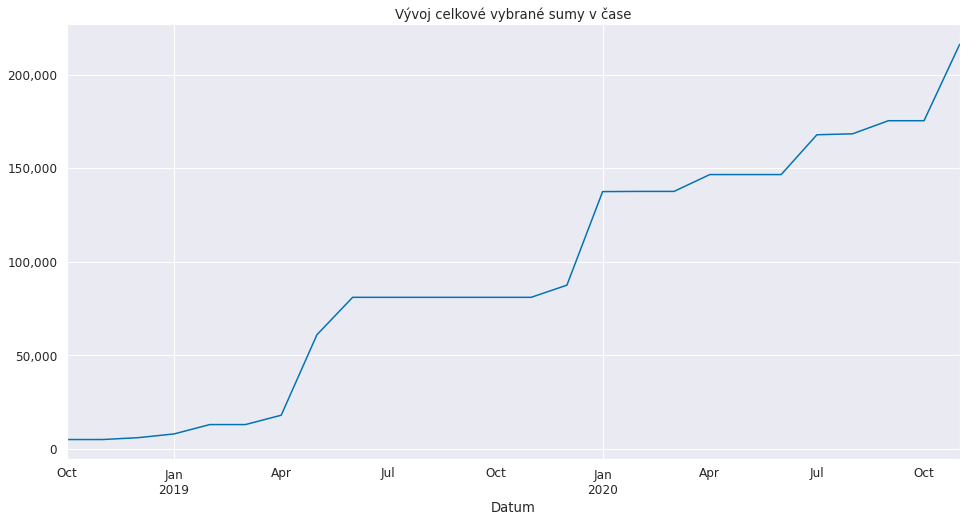

In [6]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

cbd.cumsum().plot(ax=ax, title='Vývoj celkové vybrané sumy v čase')

## Nejčetnější výše příspěvků

- jakými částkami přispívají lidé nejčastěji

In [7]:
# amount frequencies
amf = tx.value_counts(['Částka']).to_frame(name='Četnost')
amf['% Příspěvků'] = (100 * amf['Četnost'] / amf['Četnost'].sum()).round(2)
amf['% Vybraného'] = (100 * amf.index.get_level_values(0) * amf['Četnost'] / (amf.index.get_level_values(0) * amf['Četnost']).sum()).round(2)
amf.sort_values(by=['Četnost','% Vybraného'], ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
5000.0,7,26.92,16.18
10000.0,2,7.69,9.25
2000.0,2,7.69,1.85
500.0,2,7.69,0.46
50000.0,1,3.85,23.12
25000.0,1,3.85,11.56
23000.0,1,3.85,10.63
20000.0,1,3.85,9.25
15210.0,1,3.85,7.03


## Nejvýznamnější výše příspěvků

* které výše přispěvku přispívají nejvíc k celkové sumě

In [8]:
amf.sort_values(by='% Vybraného', ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
50000.0,1,3.85,23.12
5000.0,7,26.92,16.18
25000.0,1,3.85,11.56
23000.0,1,3.85,10.63
10000.0,2,7.69,9.25
20000.0,1,3.85,9.25
15210.0,1,3.85,7.03
6000.0,1,3.85,2.77
4500.0,1,3.85,2.08


## Nejvyyší příspěvky

In [9]:
tx.sort_values(by='Částka', ascending=False)[:10]

,Částka,Typ,Název protiúčtu,Zpráva pro příjemce,KS,VS,SS,Poznámka
Datum,,,,,,,,
2020-01-29,50000.0,Bezhotovostní příjem,Cetl Zdeněk,CELEALT,,2.7012e+07,,Cetl Zdeněk
2020-11-25,25000.0,Bezhotovostní příjem,Jiří Hudeček,Příspěvek na činnost strany,0,,,Jiří Hudeček
2019-05-20,23000.0,Bezhotovostní příjem,Jiří Hudeček,Příspěvek na činnost SDS - Jiří Hudeček,0,,,Jiří Hudeček
2019-05-23,20000.0,Bezhotovostní příjem,"Neubert Milan,RNDr.",Příspěvek na činnost SDS - Milan Neubert,0,123456,0,"Neubert Milan,RNDr."
2020-07-30,15210.0,Okamžitá příchozí platba,Roček Vojtěch,Příspěvek na činnost Vojtěch Roček,0,,,Roček Vojtěch
2019-06-03,10000.0,Bezhotovostní příjem,Hornych Jaroslav,PRISPEVEK SDS,0,525920,,Hornych Jaroslav
2019-06-03,10000.0,Bezhotovostní příjem,Hornych Jaroslav,PRISPEVEK SDS,0,5.10125e+08,,Hornych Jaroslav
2019-12-27,6000.0,Bezhotovostní příjem,Jiří Hudeček,Prispevek na cinnost SDS - J. Hudecek,0,,,Jiří Hudeček
2020-04-25,5000.0,Okamžitá příchozí platba,Josef Zahradník,Příspěvek na činnost Josef Zahradní,0,,,Josef Zahradník


## Velcí vs. malí dárci

- jaká část se vybrala v příspěvcích nad 10 tisíc a jaká část v příspěvcích pod 10 000 Kč

<AxesSubplot:title={'center':'Podíly různých výší příspěvků na celkové vybrané sumě'}, ylabel='Částka'>

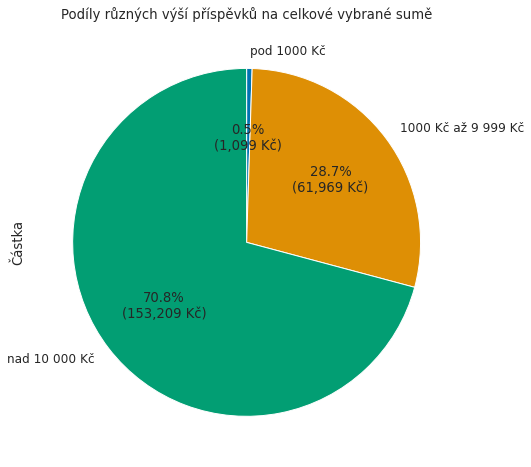

In [10]:
bins = [0, 1000, 10000, (tx['Částka'].max() // 10000 + 1)*10000]
labels = ['pod 1000 Kč','1000 Kč až 9 999 Kč','nad 10 000 Kč']
txg = tx['Částka'].groupby(by=pd.cut(tx['Částka'], bins=bins, labels=labels, right=False)).sum()
txg.plot.pie(counterclock=False, startangle=90, title='Podíly různých výší příspěvků na celkové vybrané sumě',
            autopct=lambda pct: "{:1.1f}%\n({:,} Kč)".format(pct, int(txg.sum()*pct/100)))